<a href="https://colab.research.google.com/github/ajdhiman/Google-Colab/blob/main/Basic_Convolution_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import tensorflow as tf


In [47]:
def OpenImage(img_path,grayscale=True,showImageInNotebook=True):
  img=cv2.imread(img_path)
  if (grayscale):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    #plt.imshow(img)

  if showImageInNotebook:
    try:
      cv2.imshow("display",img)
    except Exception as e:
      print(e)
      from google.colab.patches import cv2_imshow
      cv2_imshow(img)

  return img

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



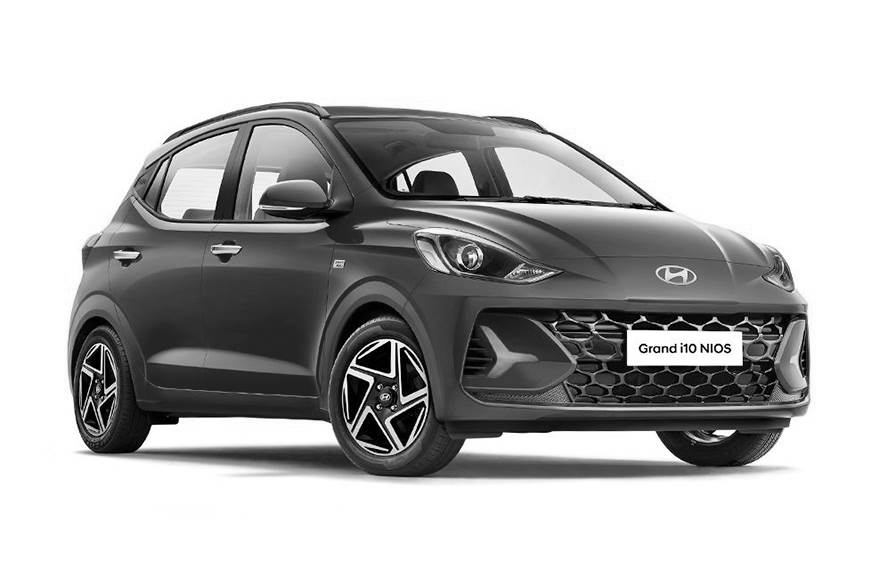

In [3]:
img=OpenImage('car1.jpg')

In [4]:
img.shape

(578, 872)

# Apply Convolution

In [5]:
rows, columns =img.shape
batch = 1
channel = 1
reshaped_img = img.reshape(batch,rows,columns,channel)

In [6]:
reshaped_img.shape

(1, 578, 872, 1)

In [7]:
conv_layers = [
    tf.keras.layers.Conv2D(filters=1,kernel_size=[3,3],strides=[1,1],input_shape=reshaped_img.shape[1:])
]

In [8]:
conv_model = tf.keras.Sequential(conv_layers)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 576, 870, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [9]:
output=conv_model.predict(reshaped_img)

1/1 [==============================] - 7s 7s/step


In [10]:
print(output.shape)

(1, 576, 870, 1)


In [11]:
rows, columns = output.shape[1:-1]
print(rows,columns)

576 870


In [13]:
reshaped_output=output.reshape(rows,columns)
reshaped_output.shape


(576, 870)

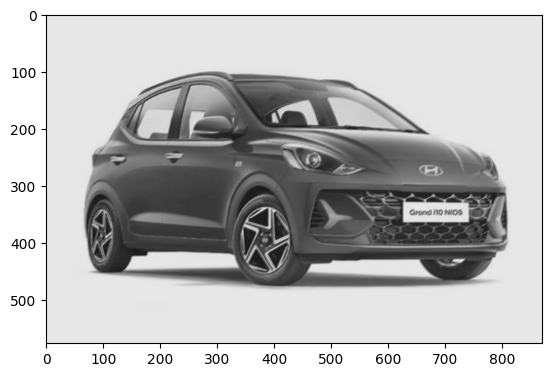

In [16]:
plt.imshow(reshaped_output,cmap="gray")

## Convolution for Colored Images

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



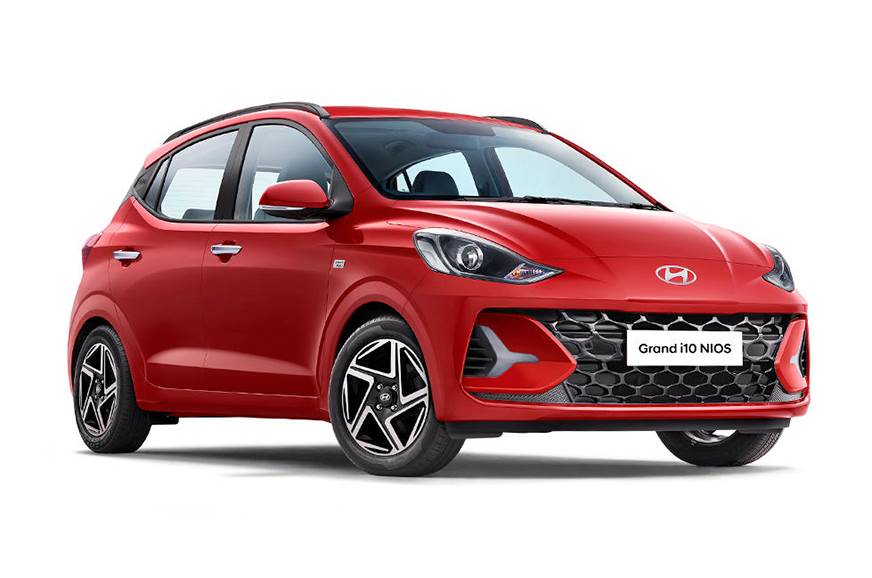

In [17]:
img=OpenImage('car1.jpg',False)

In [22]:
rows, columns, channels = img.shape
reshaped_img = img.reshape(1,rows,columns,channels)
reshaped_img.shape

(1, 578, 872, 3)

In [23]:
conv_layers = [
    tf.keras.layers.Conv2D(filters=1,kernel_size=[3,3],strides=[1,1],input_shape=reshaped_img.shape[1:])
]
conv_model = tf.keras.Sequential(conv_layers)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 576, 870, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [24]:
output=conv_model.predict(reshaped_img)
output.shape

1/1 [==============================] - 0s 103ms/step


(1, 576, 870, 1)

In [25]:
rows, columns = output.shape[1:-1]
print(rows,columns)
reshaped_output=output.reshape(rows,columns)
reshaped_output.shape

576 870


(576, 870)

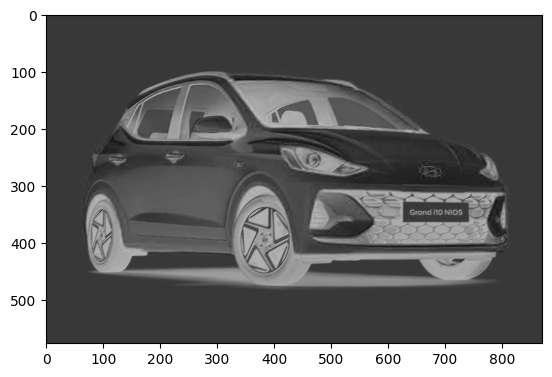

In [27]:
plt.imshow(reshaped_output,cmap="gray")

In [29]:
def ReshapeImage(img,grayscale=True):
  if grayscale:
    rows, columns =img.shape
    reshaped_img = img.reshape(1,rows,columns,1)
  else:
    rows, columns, channel =img.shape
    reshaped_img = img.reshape(1,rows,columns,channel)

  return reshaped_img

In [31]:
def GetConvolutionModel(filters=1,kernel_size=[3,3],strides=[1,1],input_shape=(20,20,1), padding="valid"):
  conv_layers = [
    tf.keras.layers.Conv2D(filters=filters,
                           kernel_size=kernel_size,
                           strides=strides,
                           input_shape=input_shape,
                           padding=padding)
  ]
  conv_model = tf.keras.Sequential(conv_layers)
  conv_model.summary()
  return conv_model

In [40]:
def ApplyConvolutionModel(img, conv_model):
  output=conv_model.predict(reshaped_img)
  rows, columns,channels = output.shape[1:]
  print(rows,columns)
  reshaped_output=output.reshape(rows,columns,channels)
  print("Output Shape",reshaped_output.shape)

  for ch in range(channels):
    plt.imshow(reshaped_output[:,:,ch],cmap="gray")
    plt.show()

# Convolution with multiple filters

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 576, 870, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 152ms/step
576 870
Output Shape (576, 870, 5)


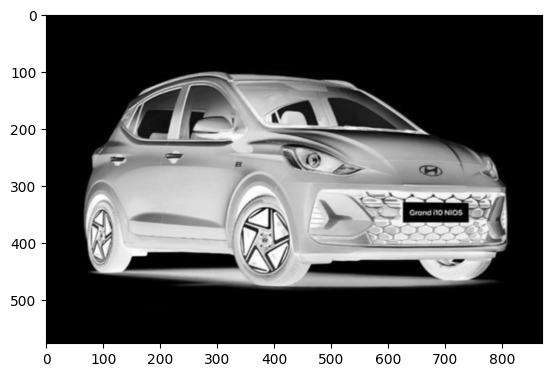

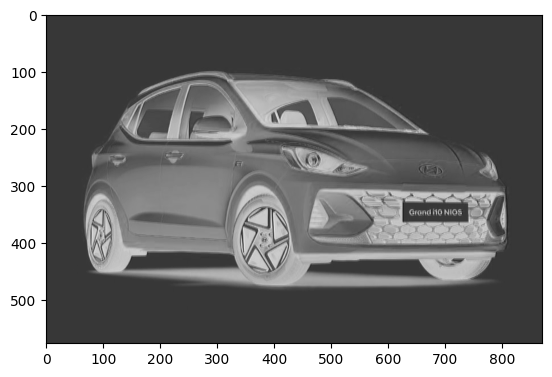

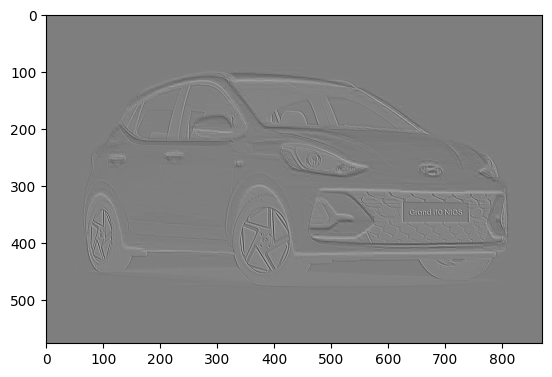

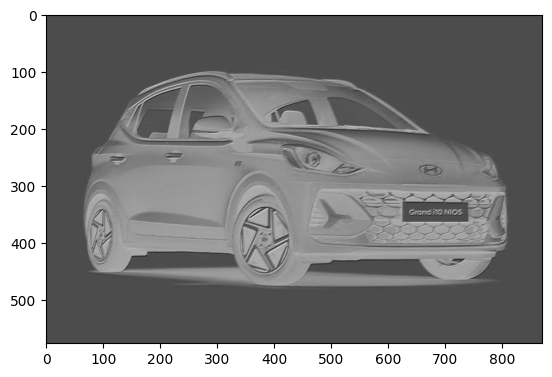

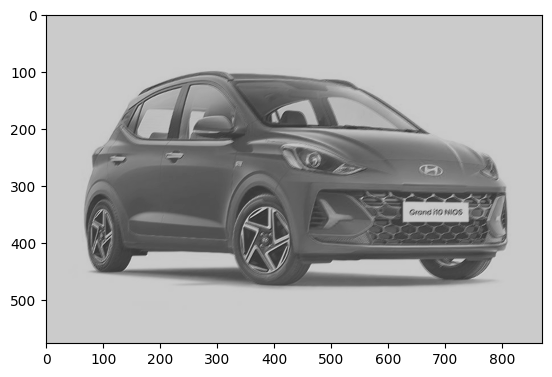

In [48]:
img=OpenImage('car1.jpg',grayscale=False,showImageInNotebook=False)
reshaped_img = ReshapeImage(img,grayscale=False)
conv_model = GetConvolutionModel(filters=5,kernel_size=[3,3],strides=[1,1],input_shape=reshaped_img.shape[1:], padding="valid")
ApplyConvolutionModel(img,conv_model)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 576, 870, 5)       50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 58ms/step
576 870
Output Shape (576, 870, 5)


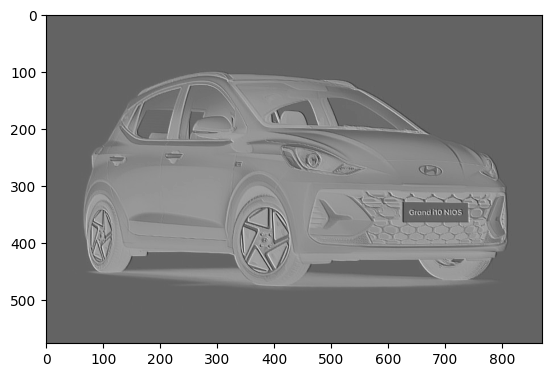

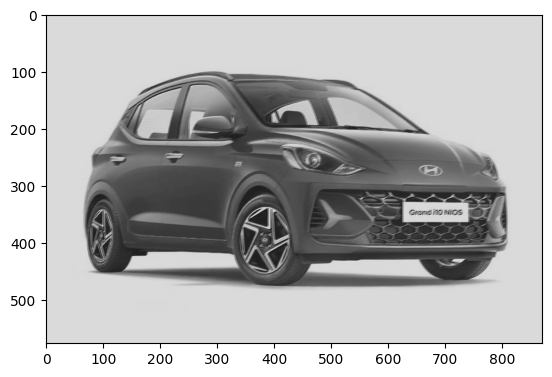

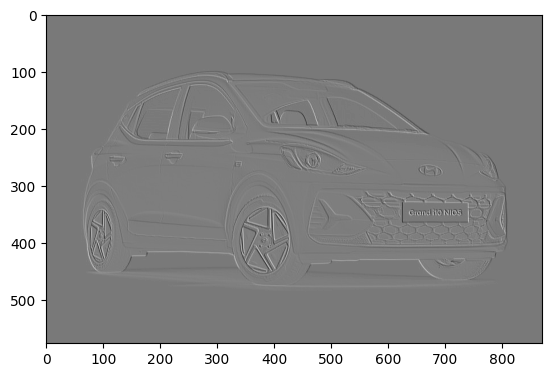

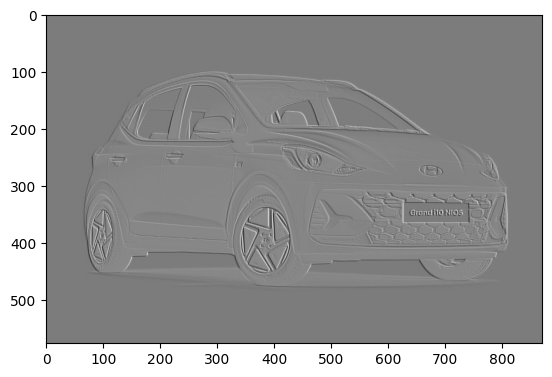

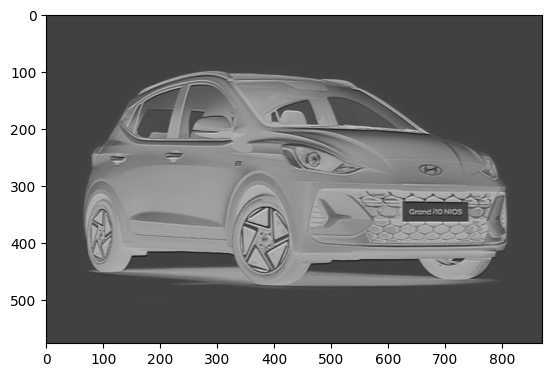

In [49]:
img=OpenImage('car1.jpg',grayscale=True,showImageInNotebook=False)
reshaped_img = ReshapeImage(img,grayscale=True)
conv_model = GetConvolutionModel(filters=5,kernel_size=[3,3],strides=[1,1],input_shape=reshaped_img.shape[1:], padding="valid")
ApplyConvolutionModel(img,conv_model)

# Pooling

In [50]:
def MaxPooling(img, pool_size=[2,2],strides=[2,2]):
  reshaped_img=ReshapeImage(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides = strides)
  result = pooling_layer(reshaped_img)
  return result

In [58]:
def Plot_PoolingImage(result):
  _, rows, columns, _=result.shape
  reshaped_img = tf.reshape(result, (rows, columns))
  plt.imshow(reshaped_img,cmap="gray")


(578, 872)
(1, 289, 436, 1)


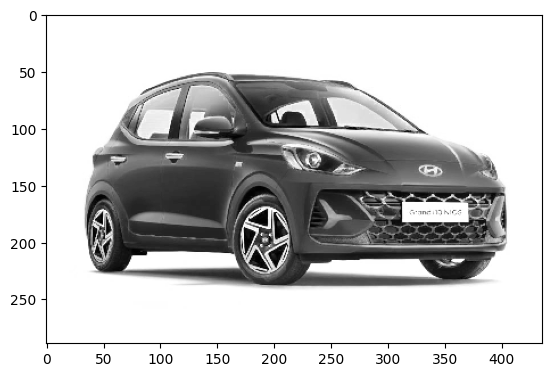

In [61]:
img=OpenImage('car1.jpg',grayscale=True,showImageInNotebook=False)
print(img.shape)
result = MaxPooling(img)
print(result.shape)
Plot_PoolingImage(result)


#reshaped_img = ReshapeImage(img,grayscale=True)
#conv_model = GetConvolutionModel(filters=5,kernel_size=[3,3],strides=[1,1],input_shape=reshaped_img.shape[1:], padding="valid")
#ApplyConvolutionModel(img,conv_model)

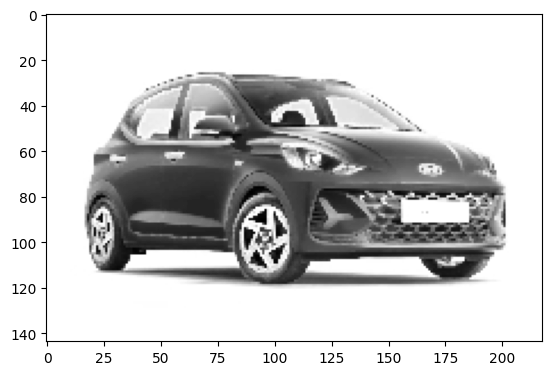

In [67]:
_, rows, columns, _=result.shape
reshaped_img = tf.reshape(result, (rows, columns))
reshaped_img.shape
result_1 = MaxPooling(reshaped_img.numpy())
Plot_PoolingImage(result_1)